In [1]:
import os
import pandas as pd
from pathlib import Path

# Metadata

In [38]:
ds = pd.read_csv('/home/bruno-pacheco/brain-age/MAPER_6_28_2022.csv')
ds.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I220542,011_S_0002,CN,M,74,1,MRI,MAPER segmentation,Post-processed,8/26/2005,NiFTI,6/23/2022
1,I220441,011_S_0005,CN,M,74,1,MRI,MAPER segmentation,Post-processed,9/02/2005,NiFTI,6/23/2022
2,I220442,011_S_0008,CN,F,85,1,MRI,MAPER segmentation,Post-processed,9/13/2005,NiFTI,6/23/2022
3,I220463,100_S_0015,CN,M,81,1,MRI,MAPER segmentation,Post-processed,9/26/2005,NiFTI,6/23/2022
4,I220444,011_S_0016,CN,M,66,1,MRI,MAPER segmentation,Post-processed,9/27/2005,NiFTI,6/23/2022


In [39]:
df = pd.read_csv('/home/bruno-pacheco/brain-age/MAPER_BRAINS_6_28_2022.csv')
df['Seg ID'] = None
df

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID
0,I35475,011_S_0002,CN,M,74,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/26/2005,NiFTI,NaN,None
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,None
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,None
3,I33066,100_S_0015,CN,M,81,1,MRI,MPR-R; ; N3; Scaled,Processed,9/26/2005,NiFTI,NaN,None
4,I32306,011_S_0016,CN,M,66,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2005,NiFTI,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,I60641,020_S_1288,CN,M,60,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/13/2007,NiFTI,NaN,None
281,I80718,094_S_1267,CN,M,73,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/16/2007,NiFTI,NaN,None
282,I75503,094_S_1267,CN,M,73,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/22/2007,NiFTI,NaN,None
283,I71395,013_S_1276,CN,F,72,2,MRI,MPR; GradWarp; N3; Scaled,Processed,3/28/2007,NiFTI,NaN,None


In [40]:
maper_ids = list()
for i in range(df.shape[0]):
    s = df.iloc[i]
    d = ds[(ds['Subject'] == s['Subject']) & (ds['Acq Date'] == s['Acq Date'])].iloc[0]

    df.iloc[i,-1] = d['Image Data ID']
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID
0,I35475,011_S_0002,CN,M,74,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/26/2005,NiFTI,NaN,I220542
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,I220441
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,I220442
3,I33066,100_S_0015,CN,M,81,1,MRI,MPR-R; ; N3; Scaled,Processed,9/26/2005,NiFTI,NaN,I220463
4,I32306,011_S_0016,CN,M,66,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2005,NiFTI,NaN,I220444


In [41]:
df.sample()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID
220,I39203,130_S_0969,CN,M,70,2,MRI,MPR; ; N3; Scaled,Processed,11/06/2006,NiFTI,8/17/2020,I220645


In [42]:
ds[ds['Image Data ID'] == 'I220645']

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
221,I220645,130_S_0969,CN,M,70,2,MRI,MAPER segmentation,Post-processed,11/06/2006,NiFTI,6/23/2022


# Data check

In [49]:
maper_dir = Path('/data/slow/MAPER/ADNI')
!ls {maper_dir}

002_S_0295  012_S_1212	027_S_0118  052_S_1251	099_S_0533  128_S_0545
002_S_0413  013_S_0502	027_S_0120  057_S_0643	099_S_0534  128_S_0863
002_S_0559  013_S_0575	027_S_0403  057_S_0779	100_S_0015  128_S_1242
002_S_0685  013_S_1035	029_S_0824  057_S_0818	100_S_0035  129_S_0778
002_S_1261  013_S_1276	029_S_0843  057_S_0934	100_S_0047  130_S_0232
002_S_1280  014_S_0519	029_S_0845  062_S_0578	100_S_0069  130_S_0886
003_S_0907  014_S_0520	029_S_0866  062_S_0768	100_S_1286  130_S_0969
003_S_0931  014_S_0548	031_S_0618  062_S_1099	109_S_0876  130_S_1200
003_S_0981  014_S_0558	032_S_0095  067_S_0019	109_S_0967  131_S_0123
003_S_1021  016_S_0359	032_S_0479  067_S_0056	109_S_1013  131_S_0319
005_S_0223  016_S_0538	032_S_0677  067_S_0059	109_S_1014  131_S_0436
005_S_0553  018_S_0043	032_S_1169  067_S_0177	114_S_0166  131_S_0441
005_S_0602  018_S_0055	033_S_0516  067_S_0257	114_S_0173  131_S_1301
005_S_0610  018_S_0369	033_S_0734  068_S_0127	114_S_0416  133_S_0433
006_S_0498  018_S_0425	033_S_0741 

In [78]:
df['IMG'] = None
df['SEG'] = None

for i in range(df.shape[0]):
    s = df.loc[i]

    subject_dir = maper_dir/s['Subject']

    assert len(list(subject_dir.glob(f"**/*{s['Image Data ID']}*"))) == 1, 'img'
    assert len(list(subject_dir.glob(f"**/*{s['Seg ID']}*"))) == 1, 'seg'

    img_fpath = next(subject_dir.glob(f"**/*{s['Image Data ID']}*"))
    seg_fpath = next(subject_dir.glob(f"**/*{s['Seg ID']}*"))

    df.loc[i,'IMG'] = str(img_fpath)
    df.loc[i,'SEG'] = str(seg_fpath)

assert df['IMG'].apply(os.path.exists).all()
assert df['SEG'].apply(os.path.exists).all()

In [79]:
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID,IMG,SEG
0,I35475,011_S_0002,CN,M,74,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/26/2005,NiFTI,NaN,I220542,/data/slow/MAPER/ADNI/011_S_0002/MPR__GradWarp...,/data/slow/MAPER/ADNI/011_S_0002/MAPER_segment...
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,I220441,/data/slow/MAPER/ADNI/011_S_0005/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0005/MAPER_segment...
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,I220442,/data/slow/MAPER/ADNI/011_S_0008/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0008/MAPER_segment...
3,I33066,100_S_0015,CN,M,81,1,MRI,MPR-R; ; N3; Scaled,Processed,9/26/2005,NiFTI,NaN,I220463,/data/slow/MAPER/ADNI/100_S_0015/MPR-R____N3__...,/data/slow/MAPER/ADNI/100_S_0015/MAPER_segment...
4,I32306,011_S_0016,CN,M,66,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2005,NiFTI,NaN,I220444,/data/slow/MAPER/ADNI/011_S_0016/MPR__GradWarp...,/data/slow/MAPER/ADNI/011_S_0016/MAPER_segment...


In [80]:
s = df.sample().iloc[0]
s

Image Data ID                                               I65561
Subject                                                 002_S_1261
Group                                                           CN
Sex                                                              F
Age                                                             71
Visit                                                            2
Modality                                                       MRI
Description                                      MPR; ; N3; Scaled
Type                                                     Processed
Acq Date                                                 2/27/2007
Format                                                       NiFTI
Downloaded                                               8/18/2020
Seg ID                                                     I221140
IMG              /data/slow/MAPER/ADNI/002_S_1261/MPR____N3__Sc...
SEG              /data/slow/MAPER/ADNI/002_S_1261/MAPER_segmen

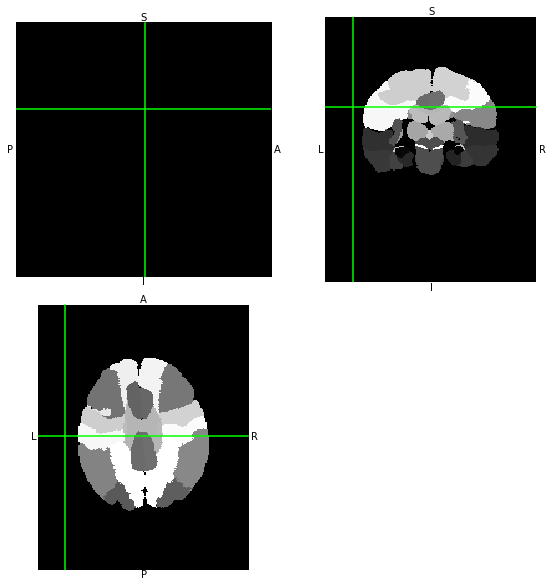

In [84]:
from brats.utils import show_mri

show_mri(s['SEG'], pos=(0,0,0))

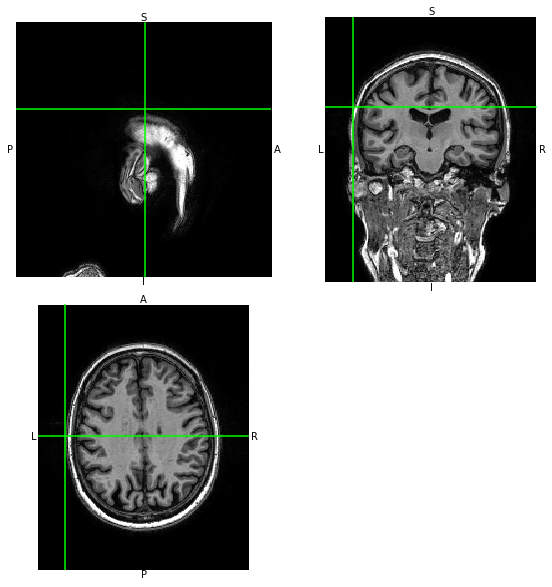

In [85]:
from brats.utils import show_mri

show_mri(s['IMG'], pos=(0,0,0))

In [100]:
df_split = pd.read_csv('/home/bruno-pacheco/brain-age/notebooks/dataframe3D.csv', index_col=0)
df_split['id'] = df_split['patient'].str.replace('ADNI_','')
df_split['id'].value_counts()

116_S_0382    16
023_S_0031    16
023_S_1190    15
023_S_0926    14
116_S_1249    14
              ..
130_S_6319     1
168_S_6098     1
094_S_6485     1
082_S_6415     1
141_S_6423     1
Name: id, Length: 666, dtype: int64

In [106]:
df['split'] = None

for i in range(df.shape[0]):
    s = df.loc[i]

    try:
        split = df_split[df_split['id'] == s['Subject']]['split'].iloc[0]
    except IndexError:
        split = 'train'
    df.loc[i,'split'] = split

assert df['split'].isin(['train', 'val', 'test']).all()

In [107]:
df['split'].value_counts()

train    167
test      61
val       57
Name: split, dtype: int64

In [110]:
df.to_pickle('/data/slow/MAPER/prep/metadata.pkl')

# Preprocessing

In [118]:
s = df.sample().iloc[0]
s

Image Data ID                                               I34698
Subject                                                 041_S_0898
Group                                                           CN
Sex                                                              F
Age                                                             83
Visit                                                            1
Modality                                                       MRI
Description               MPR; GradWarp; B1 Correction; N3; Scaled
Type                                                     Processed
Acq Date                                                10/18/2006
Format                                                       NiFTI
Downloaded                                                     NaN
Seg ID                                                     I220521
IMG              /data/slow/MAPER/ADNI/041_S_0898/MPR__GradWarp...
SEG              /data/slow/MAPER/ADNI/041_S_0898/MAPER_segmen

In [137]:
from brats.preprocessing.nipype_wrappers import ants_registration, ants_transformation
from shutil import move
from tqdm.notebook import tqdm

TEMPLATE_FPATH = Path('/home/bruno-pacheco/brain-age/data/external/SRI24_T1.nii')

for s in tqdm(df.iloc):
    reg_transform, _ = ants_registration(
        str(TEMPLATE_FPATH),
        s['IMG'],
        '.tmpdir/transf_',
    )

    prep_fpath = ants_transformation(
        s['IMG'],
        str(TEMPLATE_FPATH),
        [reg_transform,],
        '.tmpdir/sri24_',
    )

    prep_seg_fpath = ants_transformation(
        s['SEG'],
        str(TEMPLATE_FPATH),
        [reg_transform,],
        '.tmpdir/sri24_seg_',
    )
    
    move(prep_fpath, f'/data/slow/MAPER/prep/X/ADNI_MAPER_{s.name}.nii')
    move(prep_seg_fpath, f'/data/slow/MAPER/prep/y/ADNI_MAPER_{s.name}_seg.nii')

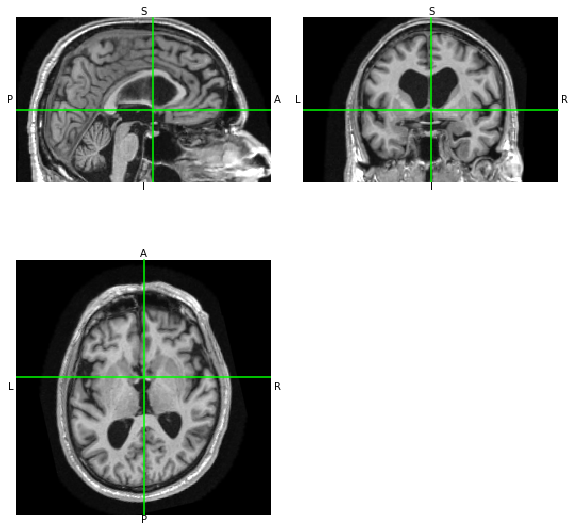

In [135]:
show_mri('/data/slow/MAPER/prep/X/ADNI_MAPER_0.nii', pos=(0,0,0))

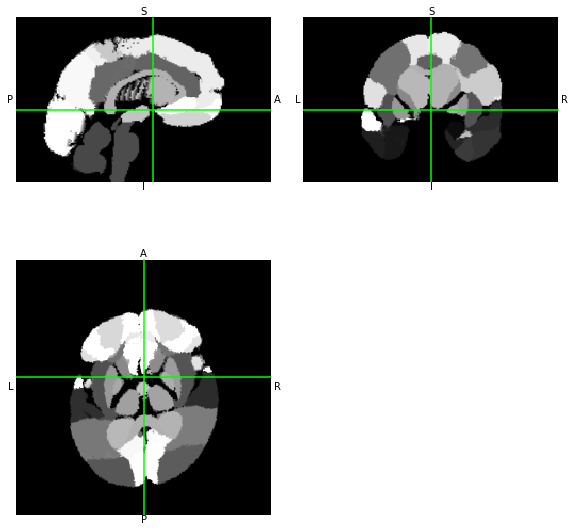

In [136]:
show_mri('/data/slow/MAPER/prep/y/ADNI_MAPER_0_seg.nii', pos=(0,0,0))